In [1]:
import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


In [39]:
mat_df=pd.read_csv('https://raw.githubusercontent.com/dubeysachin752/DataViz-comepetetion/main/Matches.csv')
deliveries =pd.read_csv('https://raw.githubusercontent.com/dubeysachin752/DataViz-comepetetion/main/Deliveries.csv')

In [3]:
mat_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
mat_df.shape

(756, 18)

In [5]:
mat_df.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [6]:
mat_df.drop('umpire3',axis=1,inplace=True)

In [7]:
mat_df.dropna(axis=0, how='any', inplace=True)

In [8]:
mat_df.isna().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

In [9]:
mat_df.shape

(743, 17)

In [10]:
mat_df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,743.000000,743.000000,743.000000,743.000000,743.000000
mean,1786.578735,2013.418573,0.025572,13.460296,3.375505
std,3455.045846,3.378787,0.157961,23.626205,3.393397
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,187.500000,2011.000000,0.000000,0.000000,0.000000
50%,374.000000,2013.000000,0.000000,0.000000,4.000000
75%,567.500000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [11]:
mat_df.nunique()

id                 743
season              12
city                32
date               538
team1               15
team2               15
toss_winner         15
toss_decision        2
result               2
dl_applied           2
winner              15
win_by_runs         89
win_by_wickets      11
player_of_match    226
venue               40
umpire1             61
umpire2             65
dtype: int64

In [12]:
mat_df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

In [13]:
mat_df.dtypes

id                  int64
season              int64
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
dtype: object

In [ ]:
#mat_df['win_by_runs']=np.reciprocal(mat_df['win_by_runs'])

In [14]:
corelation=mat_df.corr()

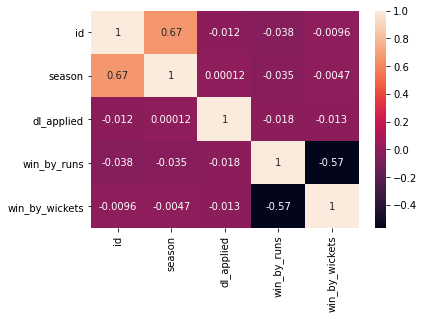

In [15]:
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


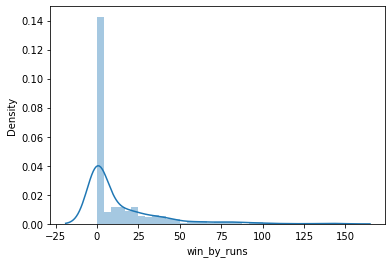

In [16]:
sns.distplot(mat_df['win_by_runs'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


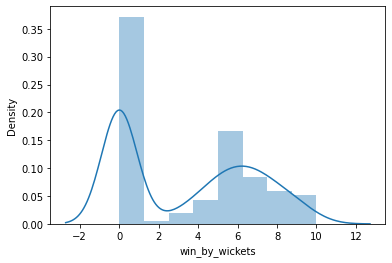

In [17]:
sns.distplot(mat_df['win_by_wickets']) 

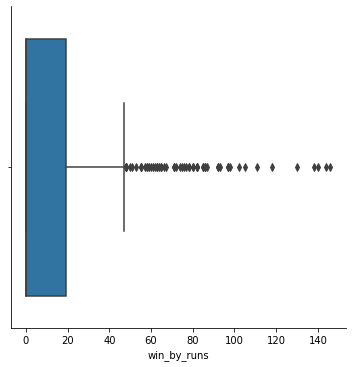

In [18]:
sns.catplot(x='win_by_runs',kind='box',data=mat_df)

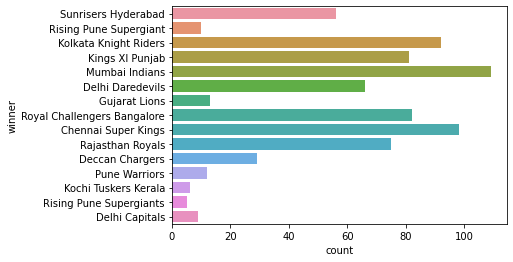

In [19]:
sns.countplot(y=mat_df['winner'])

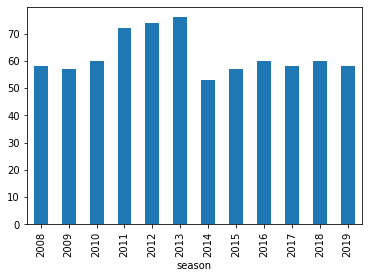

In [20]:
mat_df.groupby(['season'])['id'].count().plot(kind='bar')


In [21]:
played_in_city = mat_df.groupby(['city'])['id'].count()
played_in_city.sort_values(ascending=False).head()

city
Mumbai       101
Kolkata       77
Delhi         73
Hyderabad     64
Bangalore     63
Name: id, dtype: int64

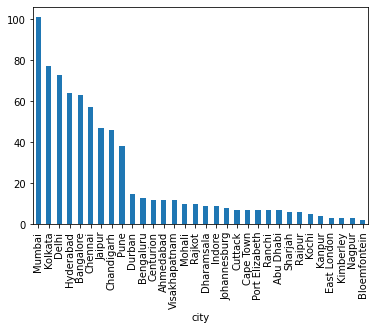

In [22]:
played_in_city.sort_values(ascending=False).plot(kind='bar')

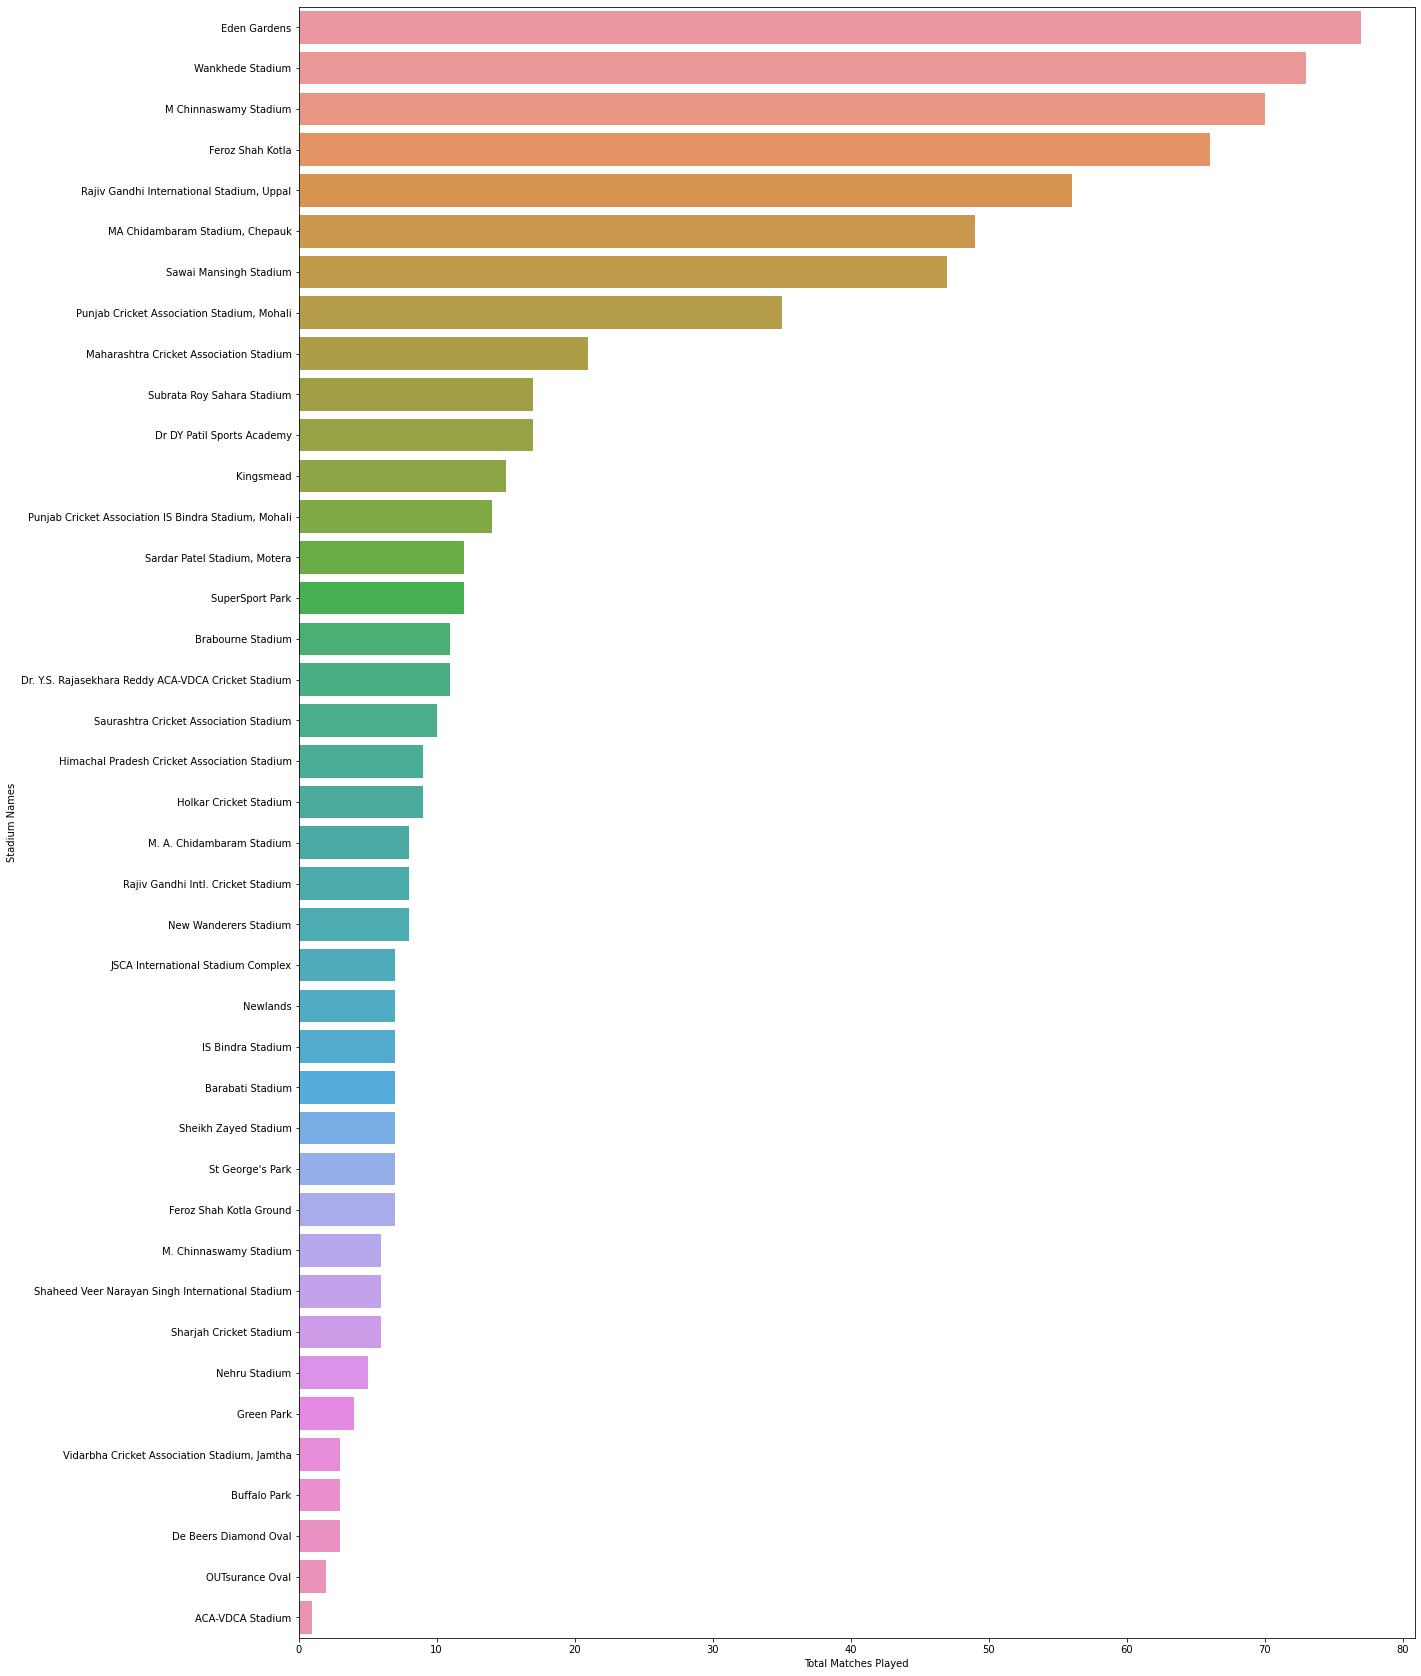

In [24]:
plt.subplots(figsize=(20,30))
chart = sns.countplot(y=mat_df['venue'],order = mat_df['venue'].value_counts().index)
chart.set(xlabel='Total Matches Played', ylabel='Stadium Names')
plt.show()

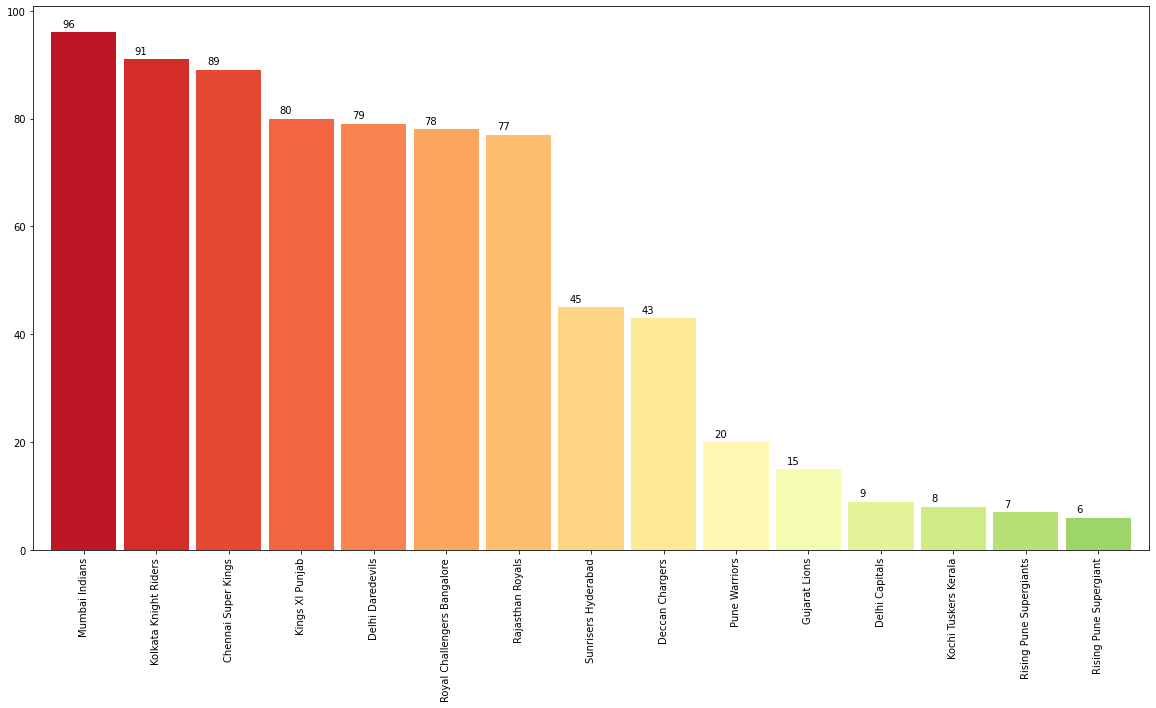

In [25]:
plt.subplots(figsize=(20,10))
ax=mat_df['toss_winner'].value_counts().plot.bar(width=0.9,color=sns.color_palette('RdYlGn',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

In [26]:
bat_and_won = mat_df[(mat_df['toss_decision'] == 'bat') & 
                      (mat_df['toss_winner'] == mat_df['winner'])]
print(f'Percentage : {(len(bat_and_won)/len(mat_df)*100)}')

# percentage the team who won tosse choosse to bat first 

Percentage : 17.765814266487215


In [27]:
# percentage the team who won tosse choosse to field first 
field_and_won = mat_df[(mat_df['toss_decision'] == 'field') & 
                        (mat_df['toss_winner'] == mat_df['winner'])]
print(f'Percentage : {(len(field_and_won)/len(mat_df)*100)}')

Percentage : 34.45491251682369


In [28]:
matches_winner = mat_df['toss_winner'] == mat_df['winner']
matches_winner = matches_winner.value_counts()
labels = ["Win The match",'Loss The Match']

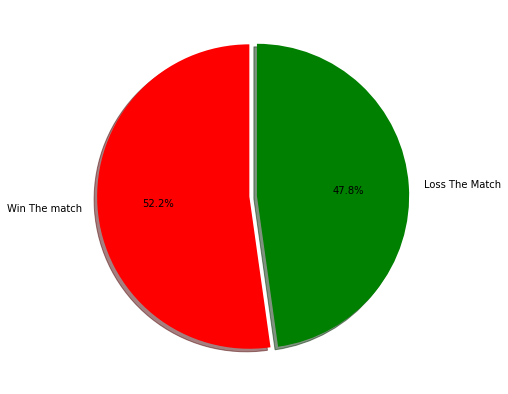

In [29]:
fig = plt.figure(figsize =(10, 7)) 
plt.pie(matches_winner, labels = labels,startangle=90,shadow=True,
        explode=(0,0.05),autopct='%1.1f%%',colors=['r','g']); 

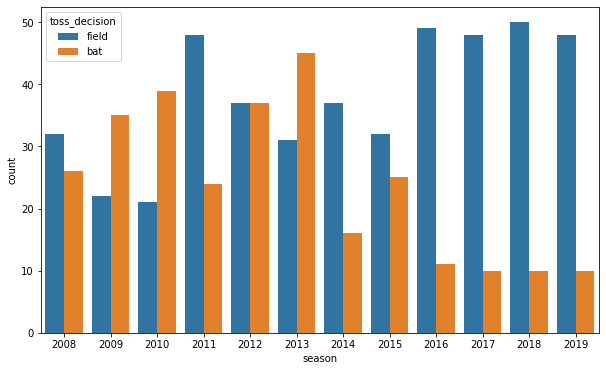

In [31]:
plt.subplots(figsize=(10,6))
sns.countplot(x='season',hue='toss_decision',data=mat_df)
plt.show()  



In [32]:
top_player = mat_df['player_of_match'].value_counts()[:10]

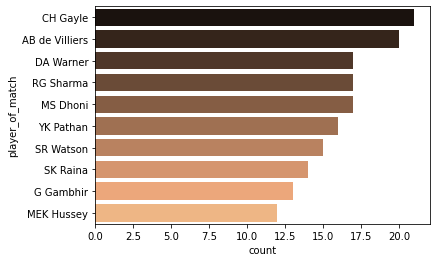

In [35]:
sns.countplot(y='player_of_match',
              data=mat_df,
              palette="copper",
              order=mat_df['player_of_match'].value_counts().iloc[:10].index)
plt.show()

In [36]:
temp_df = mat_df.drop_duplicates(subset=['season'],
                                  keep='last')[['season', 'winner']].reset_index(drop=True)
temp_df.sort_values(by='season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


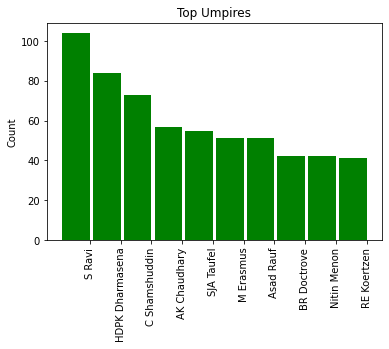

In [38]:
temp_df = pd.melt(mat_df, id_vars=['id'], value_vars=['umpire1', 'umpire2'])
temp_series = temp_df.value.value_counts()[:10]
labels = np.array(temp_series.index)
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_series), width=width, color='g')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top Umpires")
plt.show()

In [40]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [49]:
total_run_of_players = deliveries.groupby(['batsman'])['total_runs'].count()
total_run_of_players = pd.DataFrame(total_run_of_players)
top_20_runners = total_run_of_players.sort_values(by='total_runs',ascending=False).head(10)

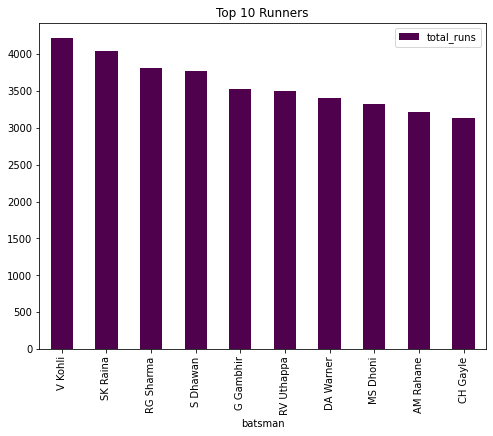

In [53]:
top_20_runners.plot(kind='bar',
                   title = 'Top 10 Runners',
                   color=sns.color_palette('BuPu_r',100),
                   figsize=[8,6])
plt.show()

In [54]:
batsman_with_most_number_of_boundires = deliveries.groupby('batsman')['batsman_runs'].agg(lambda x : 
                    (x == 4).sum()).reset_index().sort_values(by='batsman_runs',
                    ascending=False).reset_index(drop=True)
top_20_players_with_most_boundires = batsman_with_most_number_of_boundires[:10]

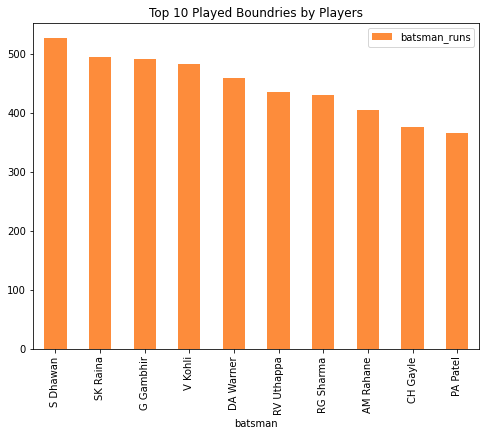

In [57]:
boundires = deliveries.groupby('batsman')['batsman_runs'].agg(lambda x : 
                    (x == 4).sum())
boundires = pd.DataFrame(boundires)
top_20_boundires_played = boundires.sort_values(by='batsman_runs',ascending=False).head(10)
top_20_boundires_played.plot(kind='bar',
                   title = 'Top 10 Played Boundries by Players',
                   color=sns.color_palette('Oranges',1),
                   figsize=[8,6])
plt.show()

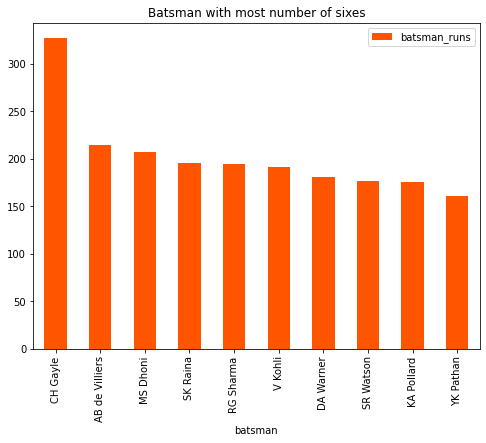

In [58]:
boundires = deliveries.groupby('batsman')['batsman_runs'].agg(lambda x : 
                    (x == 6).sum())
boundires = pd.DataFrame(boundires)
top_20_sixers_played = boundires.sort_values(by='batsman_runs',ascending=False).head(10)
top_20_sixers_played.plot(kind='bar',
                   title = 'Batsman with most number of sixes',
                   color=sns.color_palette('autumn',2),
                   figsize=[8,6])
plt.show()

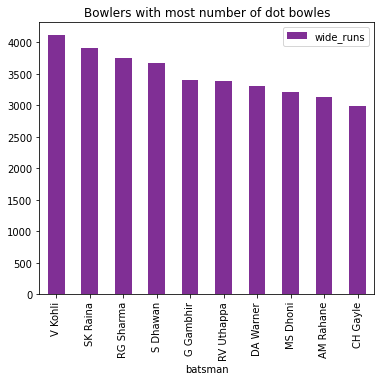

In [60]:
top_10_dot_balls = deliveries.groupby(['batsman'])['wide_runs'].agg(lambda x : 
                    (x == 0).sum())
top_10_dot_balls = pd.DataFrame(top_10_dot_balls)
top_10_dot_balls = top_10_dot_balls.sort_values(by='wide_runs',ascending=False).head(10)
top_10_dot_balls.plot(kind='bar',
                   title = 'Bowlers with most number of dot bowles',
                   color=sns.color_palette('CMRmap',2),
                   figsize=[6,5])
plt.show()

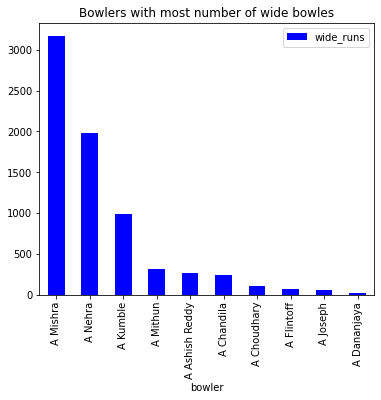

In [61]:
top_10_wide_bowls = deliveries.groupby(['bowler'])['wide_runs'].count()[:10]
top_10_wide_bowls = pd.DataFrame(top_10_wide_bowls)
top_10_wide_bowls = top_10_wide_bowls.sort_values(by='wide_runs',ascending=False).head(10)
top_10_wide_bowls.plot(kind='bar',
                   title = 'Bowlers with most number of wide bowles',
                   color=sns.color_palette('flag_r',2),
                   figsize=[6,5])
plt.show()

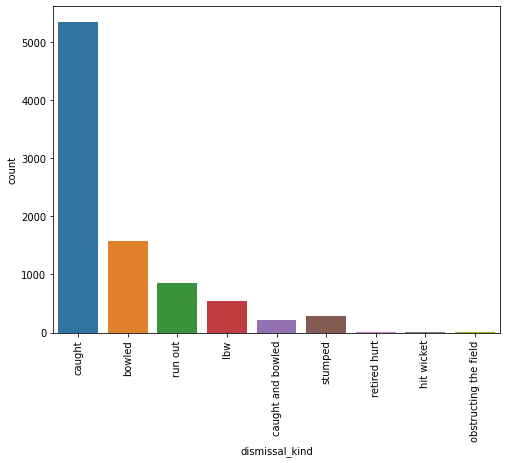

In [62]:
plt.figure(figsize=(8,6))
sns.countplot(x='dismissal_kind', data=deliveries)
plt.xticks(rotation='vertical')
plt.show()